![png](../../../imagenes/logotipo-axity-ppt.png)

# Upper Confidence Bound (UCB) - Solución

## Planteamiento del Problema

Supongamos que llegamos a un casino, en el que tenemos varias máquinas tragamonedas. El objetivo es maximizar la ganancia que una persona podría obtener, si juega de manera aleatoria en las máquinas.  

Utilizaremos el aprendizaje por reforzamiento, mediante el método UCB, para encontrar la máquina que proporcionará las mayores ganancias.  

### Los datos
Generaremos un conjunto de datos aleatorio, con 200 observaciones de 5 máquinas tragamonedas.  

El conjunto de datos contiene la recompensa de cada máquina en cada observación. Es decir, si el jugador ganó, la recompensa es 1; si el jugador perdió, la recompensa es 0.  

Basándonos en estas recompensas, la tarea es identificar cuál de las máquinas proporcionará mayores ganancias.

## Generación de Datos

In [1]:
# Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generar los datos
import random
data = {}
data['B1'] = [random.randint(0,1) for x in range(10000)]
data['B2'] = [random.randint(0,1) for x in range(10000)]
data['B3'] = [random.randint(0,1) for x in range(10000)]
data['B4'] = [random.randint(0,1) for x in range(5000)]
data['B5'] = [random.randint(0,1) for x in range(5000)]
dataset = pd.DataFrame(data)

In [3]:
# Revisión del conjunto de datos
dataset.head()

B1  B2  B3  B4  B5
0   0   1   1   1   0
1   1   1   0   0   0
2   1   0   0   1   0
3   1   0   1   1   0
4   1   1   0   1   0

## Selección Aleatoria

Para validar la eficiencia del algoritmo a utilizar, generemos una selección aleatoria de las máquinas.  

In [5]:
# Implementar una Selección Aleatoria
import random
N = 5000
d = 5
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [6]:
# Visualizar la selección de las máquinas
plt.hist(ads_selected)
plt.xlabel("Máquina")
plt.ylabel("Frecuencia de selección de la máquina")
plt.show()

In [7]:
# Visualizar los resultados
print("\nGanancia total = ", total_reward)


Ganancia total =  2501


## Usando Upper Confidence Bound (UCB)

In [8]:
# Algoritmo de UCB
import math
N = 5000
d = 5
number_of_selections = [0] * d
sums_of_rewards = [0] * d
ads_selected = []
total_reward = 0
for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):
        if(number_of_selections[i]>0):
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [9]:
# Visualizar la selección de las máquinas
plt.hist(ads_selected)
plt.xlabel("Máquina")
plt.ylabel("Frecuencia de selección de la máquina")
plt.show()

In [10]:
# Visualizar los resultados
print("\n\nGanancia por máquina = ", sums_of_rewards)
print("\nGanancia total = ", total_reward)



Ganancia por máquina =  [490, 575, 556, 577, 321]

Ganancia total =  2519


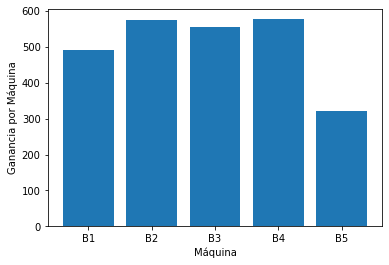

In [11]:
# Visualizar las ganancias por máquina
plt.bar(['B1','B2','B3','B4','B5'],sums_of_rewards)
plt.xlabel('Máquina')
plt.ylabel('Ganancia por Máquina')
plt.show()

## ¡Buen trabajo!